# Topic
Elon musk first tweeted about doge coin in 20th December of 2020. It is assumed that because of this tweet, the dogecoin prices went up by 20%. We will verify this impact using google causal impact.
<br>
[Link to the tweet](https://twitter.com/elonmusk/status/1340590280848908288)

In [1]:
import yfinance as yf
import pandas as pd
from causalimpact import CausalImpact 
import seaborn as sns
import matplotlib.pyplot as plt

2023-04-29 08:38:43.832136: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-29 08:38:43.882626: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-29 08:38:43.883663: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 08:38:44.730237: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Data Collection

## Setting the Dates

In [2]:
#Dates
training_start = "2019-12-19"
training_end = "2020-12-19"
treatment_start = "2020-12-20"
treatment_end = "2021-01-31"
end_stock = "2021-02-01"

## Downloading from Yahoo Finances

In [3]:
#Download VW stock
y = ["DOGE-USD"]
y = yf.download(tickers = y,
                start = training_start,
                end = end_stock,
                interval = "1d")
y = y['Adj Close'].rename("y")
y.head(5)

[*********************100%***********************]  1 of 1 completed


Date
2019-12-19    0.002123
2019-12-20    0.002075
2019-12-21    0.002084
2019-12-22    0.002115
2019-12-23    0.002073
Name: y, dtype: float64

In [4]:
#Load more stock data
stocks = ["RDD-USD", "MONA-USD", "TIPS-USD", "DOGEC-USD", "LCC-USD",
           "GRLC-USD", "POT-USD"]

X = yf.download(tickers = stocks,
                start = training_start,
                end = end_stock,
                interval = "1d").loc[:, ('Adj Close')]
X.head()

[*********************100%***********************]  7 of 7 completed


,DOGEC-USD,GRLC-USD,LCC-USD,MONA-USD,POT-USD,RDD-USD,TIPS-USD
Date,,,,,,,
2019-12-19,0.010818,0.000503,0.007144,0.769842,0.005842,0.000650,1.000000e-06
2019-12-20,0.011914,0.000505,0.007004,0.787640,0.005849,0.000651,1.000000e-06
2019-12-21,0.013660,0.000647,0.006968,0.803981,0.005248,0.000578,1.000000e-06
2019-12-22,0.014941,0.000676,0.006905,0.835598,0.004956,0.000602,1.000000e-06
2019-12-23,0.011691,0.000662,0.006397,0.811020,0.005220,0.000597,1.000000e-06


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 410 entries, 2019-12-19 to 2021-01-31
Freq: D
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DOGEC-USD  410 non-null    float64
 1   GRLC-USD   410 non-null    float64
 2   LCC-USD    410 non-null    float64
 3   MONA-USD   410 non-null    float64
 4   POT-USD    407 non-null    float64
 5   RDD-USD    410 non-null    float64
 6   TIPS-USD   410 non-null    float64
dtypes: float64(7)
memory usage: 25.6 KB


In [6]:
X.describe()

,DOGEC-USD,GRLC-USD,LCC-USD,MONA-USD,POT-USD,RDD-USD,TIPS-USD
count,410.000000,410.000000,410.000000,410.000000,407.000000,410.000000,4.100000e+02
mean,0.012041,0.001548,0.004324,1.469262,0.008287,0.001081,1.078049e-06
std,0.007028,0.001315,0.001774,0.325609,0.002874,0.000418,2.775303e-07
min,0.002566,0.000088,0.001824,0.753080,0.004027,0.000470,1.000000e-06
25%,0.007706,0.000460,0.003341,1.245884,0.006284,0.000852,1.000000e-06
50%,0.009626,0.001315,0.003914,1.406287,0.007882,0.001038,1.000000e-06
75%,0.014875,0.002404,0.005119,1.710849,0.008800,0.001254,1.000000e-06
max,0.038360,0.008687,0.012383,2.693467,0.022703,0.005293,3.000000e-06


In [7]:
X.index = X.index.tz_localize(None)
X.index

DatetimeIndex(['2019-12-19', '2019-12-20', '2019-12-21', '2019-12-22',
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28',
               ...
               '2021-01-22', '2021-01-23', '2021-01-24', '2021-01-25',
               '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
               '2021-01-30', '2021-01-31'],
              dtype='datetime64[ns]', name='Date', length=410, freq='D')

In [8]:
y.index = y.index.tz_localize(None)

## Making the df

In [9]:
df = pd.concat([y,X], axis = 1).dropna()
df.head()

,y,DOGEC-USD,GRLC-USD,LCC-USD,MONA-USD,POT-USD,RDD-USD,TIPS-USD
Date,,,,,,,,
2019-12-19,0.002123,0.010818,0.000503,0.007144,0.769842,0.005842,0.000650,1.000000e-06
2019-12-20,0.002075,0.011914,0.000505,0.007004,0.787640,0.005849,0.000651,1.000000e-06
2019-12-21,0.002084,0.013660,0.000647,0.006968,0.803981,0.005248,0.000578,1.000000e-06
2019-12-22,0.002115,0.014941,0.000676,0.006905,0.835598,0.004956,0.000602,1.000000e-06
2019-12-23,0.002073,0.011691,0.000662,0.006397,0.811020,0.005220,0.000597,1.000000e-06


In [10]:
df_training = df.loc[(df.index <= training_end), :]
df_training

,y,DOGEC-USD,GRLC-USD,LCC-USD,MONA-USD,POT-USD,RDD-USD,TIPS-USD
Date,,,,,,,,
2019-12-19,0.002123,0.010818,0.000503,0.007144,0.769842,0.005842,0.000650,1.000000e-06
2019-12-20,0.002075,0.011914,0.000505,0.007004,0.787640,0.005849,0.000651,1.000000e-06
2019-12-21,0.002084,0.013660,0.000647,0.006968,0.803981,0.005248,0.000578,1.000000e-06
2019-12-22,0.002115,0.014941,0.000676,0.006905,0.835598,0.004956,0.000602,1.000000e-06
2019-12-23,0.002073,0.011691,0.000662,0.006397,0.811020,0.005220,0.000597,1.000000e-06
...,...,...,...,...,...,...,...,...
2020-12-15,0.003206,0.007582,0.003276,0.002397,1.382280,0.006409,0.001039,1.000000e-06
2020-12-16,0.003416,0.008105,0.003629,0.002545,1.442342,0.007245,0.001109,1.000000e-06
2020-12-17,0.003730,0.009341,0.005478,0.002739,1.491895,0.008670,0.001141,1.000000e-06


# Checking Quality of Data

## Checking Stationarity

In [11]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
test = adfuller(x = df_training.y)[1]

#how to read - ifelse
if test < 0.05:
  print("The Time Series is stationary")
else:
  print("The Time Series is not stationary")

The Time Series is not stationary


We have to make this data stationary.

### Differencing

In [12]:
differencing = df_training.pct_change().dropna()
differencing.head(2)

,y,DOGEC-USD,GRLC-USD,LCC-USD,MONA-USD,POT-USD,RDD-USD,TIPS-USD
Date,,,,,,,,
2019-12-20,-0.022610,0.101313,0.003976,-0.019597,0.023119,0.001198,0.001538,0.0
2019-12-21,0.004337,0.146550,0.281188,-0.005140,0.020747,-0.102753,-0.112135,0.0


In [13]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
test = adfuller(x = differencing.y)[1]

#how to read - ifelse
if test < 0.05:
  print("The Time Series is stationary")
else:
  print("The Time Series is not stationary")

The Time Series is stationary


## Checking correlations

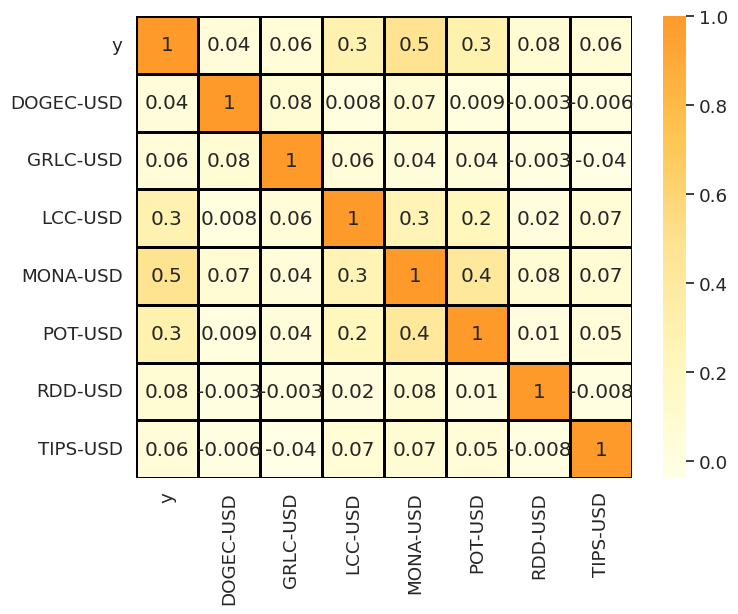

In [14]:
#Correlation Matrix
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.heatmap(differencing.corr(),
            annot = True,
            fmt = '.1g',
            cmap = 'YlOrBr',
            center =  True,
            linewidth = 1,
            linecolor = 'black')
plt.show()

### Dropping variables with low correlations with the label

In [15]:
df_final = df.drop(columns = ['TIPS-USD', 'RDD-USD', 'GRLC-USD', 'DOGEC-USD'])
df_final

,y,LCC-USD,MONA-USD,POT-USD
Date,,,,
2019-12-19,0.002123,0.007144,0.769842,0.005842
2019-12-20,0.002075,0.007004,0.787640,0.005849
2019-12-21,0.002084,0.006968,0.803981,0.005248
2019-12-22,0.002115,0.006905,0.835598,0.004956
2019-12-23,0.002073,0.006397,0.811020,0.005220
...,...,...,...,...
2021-01-27,0.007482,0.004563,1.510407,0.011690
2021-01-28,0.034084,0.005030,1.568909,0.013020
2021-01-29,0.047162,0.005315,1.615260,0.016509


## Building a regularly spaced series

In [16]:
from tensorflow_probability.python.sts import regularize_series
df_final_regular = regularize_series(df_final)

In [17]:
df_final_regular.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 410 entries, 2019-12-19 to 2021-01-31
Freq: <DateOffset: days=1>
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   y         407 non-null    float64
 1   LCC-USD   407 non-null    float64
 2   MONA-USD  407 non-null    float64
 3   POT-USD   407 non-null    float64
dtypes: float64(4)
memory usage: 16.0 KB


### Filling missing values with interopolation

In [18]:
df_final_regular.interpolate(method='linear', axis=0, inplace = True)

# Causal Impact

In [19]:
#Pre and post period
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]
pre_period, post_period

(['2019-12-19', '2020-12-19'], ['2020-12-20', '2021-01-31'])

## Training the model

In [20]:
#Google Causal Impact
impact = CausalImpact(data = df_final_regular,
                      pre_period = pre_period,
                      post_period = post_period)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


2023-04-29 08:38:47.983911: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'shape' with dtype int32 and shape [1]
	 [[{{node shape}}]]
2023-04-29 08:38:47.984029: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'shape' with dtype int32 and shape [1]
	 [[{{node shape}}]]
2023-04-29 08:38:47.996309: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'shape' with dtype int32 and shape [1]
	 [[{{node shape}}]]
2023-04-29 08:38:47.996422: I tens

Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`


2023-04-29 08:38:50.325977: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node square_root_bijectorInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-04-29 08:38:50.348805: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node square_root_bijectorInverseGamma_1_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-04-29 08:38:50.404697: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node IndependentInverseG

Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.


2023-04-29 08:38:50.563576: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node monte_carlo_variational_loss/expectation/IndependentInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-04-29 08:38:53.935889: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node monte_carlo_variational_loss/expectation/square_root_bijectorInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-04-29 08:38:53.957128: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): IN

Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


2023-04-29 08:39:37.343073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1' with dtype int32 and shape [2]
	 [[{{node AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1}}]]
2023-04-29 08:39:37.441135: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/whil

## Summary Stats and Visualization

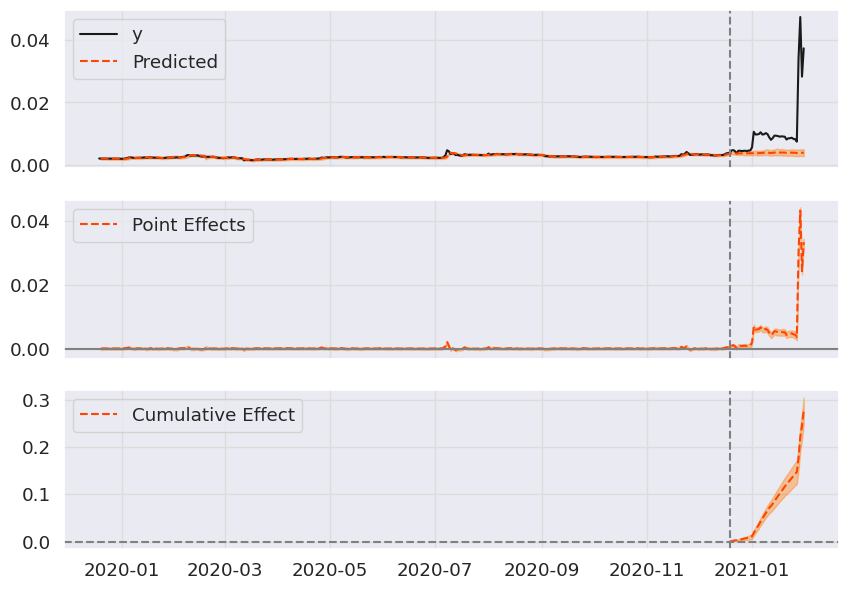

In [21]:
impact.plot()

In [22]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.01               0.44
Prediction (s.d.)         0.0 (0.0)          0.17 (0.01)
95% CI                    [0.0, 0.0]         [0.14, 0.19]

Absolute effect (s.d.)    0.01 (0.0)         0.28 (0.01)
95% CI                    [0.01, 0.01]       [0.25, 0.3]

Relative effect (s.d.)    166.21% (7.99%)    166.21% (7.99%)
95% CI                    [150.82%, 182.13%] [150.82%, 182.13%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


# Conclusion
Overall, the output suggests that there is strong evidence of a causal effect and that the effect is statistically significant.

In [23]:
#Summary report
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 0.01. By contrast, in the absence of an
intervention, we would have expected an average response of 0.0.
The 95% interval of this counterfactual prediction is [0.0, 0.0].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 0.01 with a 95% interval of
[0.01, 0.01]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 0.44.
By contrast, had the intervention not taken place, we would have expected
a sum of 0.17. The 95% interval of this prediction is [0.14, 0.19].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed an incre